In [1]:
import os
import copy
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt 

from dekef.base_density import *

from IFdensity.contam_sm_de import *
from IFdensity.influence_function import *

from IPython.display import Markdown as md

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed 
data_waiting = df[df != 108.0]

# bandwidth parameter in the Gaussian kernel function
bw = 7.0

# penalty parameter 
log_pen_param = -10.0

# base density 
base_density = BasedenGamma(np.load('data/geyser.npy').astype(np.float64)[:, 0])

plot_kwargs = plot_IF_1d_params(x_limit=(21., 410.), plot_pts_cnt = 2000)

In [11]:
# contaminated data 
contam_data_list = np.arange(90000., 95000., 100)
if_norm = []
if_limit_norm = []
for contam_pt in contam_data_list: 
    
    print('-' * 50)
    print(f'Current contaminated data point is {contam_pt}.')
    
    contam_data = np.array([[contam_pt]])
    
    ifun = SMInfluenceFunction(
        data = data_waiting, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)
    
    if_norm.append(ifun.eval_IF_natparam_norm())

    if_limit_norm.append(ifun.eval_IF_natparam_limit_norm_1d())
            

--------------------------------------------------
Current contaminated data point is 90000.0.
--------------------------------------------------
Current contaminated data point is 90100.0.
--------------------------------------------------
Current contaminated data point is 90200.0.
--------------------------------------------------
Current contaminated data point is 90300.0.
--------------------------------------------------
Current contaminated data point is 90400.0.
--------------------------------------------------
Current contaminated data point is 90500.0.
--------------------------------------------------
Current contaminated data point is 90600.0.
--------------------------------------------------
Current contaminated data point is 90700.0.
--------------------------------------------------
Current contaminated data point is 90800.0.
--------------------------------------------------
Current contaminated data point is 90900.0.
--------------------------------------------------

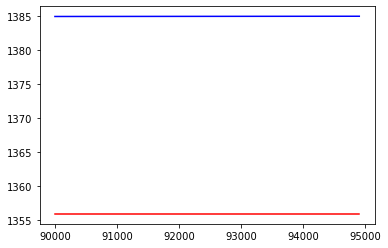

In [12]:
plt.plot(contam_data_list, if_norm, 'b-')
plt.plot(contam_data_list, if_limit_norm, 'r-')

In [14]:
# contaminated data 
contam_data_list = np.arange(90000000., 90005000., 200)
if_norm = []
if_limit_norm = []
for contam_pt in contam_data_list: 
    
    print('-' * 50)
    print(f'Current contaminated data point is {contam_pt}.')
    
    contam_data = np.array([[contam_pt]])
    
    ifun = SMInfluenceFunction(
        data = data_waiting, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)
    
    if_norm.append(ifun.eval_IF_natparam_norm())

    if_limit_norm.append(ifun.eval_IF_natparam_limit_norm_1d())
            

--------------------------------------------------
Current contaminated data point is 90000000.0.
--------------------------------------------------
Current contaminated data point is 90000200.0.
--------------------------------------------------
Current contaminated data point is 90000400.0.
--------------------------------------------------
Current contaminated data point is 90000600.0.
--------------------------------------------------
Current contaminated data point is 90000800.0.
--------------------------------------------------
Current contaminated data point is 90001000.0.
--------------------------------------------------
Current contaminated data point is 90001200.0.
--------------------------------------------------
Current contaminated data point is 90001400.0.
--------------------------------------------------
Current contaminated data point is 90001600.0.
--------------------------------------------------
Current contaminated data point is 90001800.0.
--------------------

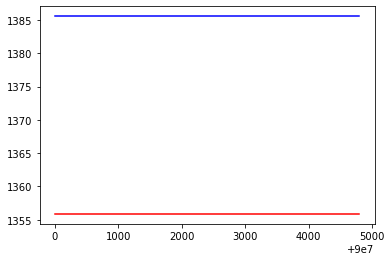

In [15]:
plt.plot(contam_data_list, if_norm, 'b-')
plt.plot(contam_data_list, if_limit_norm, 'r-')

In [16]:
contam_pt = 250.
contam_data = np.array([[contam_pt]])
ifun = SMInfluenceFunction(
        data = data_waiting, 
        contam_data = contam_data, 
        contam_weight = 1e-8, 
        penalty_param = np.exp(log_pen_param), 
        base_density = base_density, 
        bw = bw)

In [18]:
ifun.contam_density.kernel_function_data.bw

7.0

In [23]:
ifun.contam_density.kernel_function_data.partial_kernel_matrix_22(new_data = data_waiting.reshape(-1, 1))

array([[ 1.24947938e-03, -7.62823489e-04,  1.03251647e-04, ...,
         1.23220335e-04, -6.78639828e-04,  1.18648472e-03],
       [-7.62823489e-04,  1.24947938e-03, -2.81831077e-04, ...,
        -4.30507683e-04,  5.23313305e-05, -6.78639828e-04],
       [ 1.03251647e-04, -2.81831077e-04,  1.24947938e-03, ...,
         1.18648472e-03,  6.19688074e-06,  1.23220335e-04],
       ...,
       [ 1.23220335e-04, -4.30507683e-04,  1.18648472e-03, ...,
         1.24947938e-03,  9.84487501e-06,  1.38804621e-04],
       [-6.78639828e-04,  5.23313305e-05,  6.19688074e-06, ...,
         9.84487501e-06,  1.24947938e-03, -7.62823489e-04],
       [ 1.18648472e-03, -6.78639828e-04,  1.23220335e-04, ...,
         1.38804621e-04, -7.62823489e-04,  1.24947938e-03]])

In [25]:
3/7**4

0.0012494793835901709